## Experiment 9
###  Write a Python program to implement  Naive Bayes classifier and calculate the accuracy, precision, and recall for your data set.*

Model Report

Accuracy: 0.9777777777777777
Precision: 0.9793650793650793
Recall: 0.9777777777777777

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.92      0.96        13
   virginica       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45



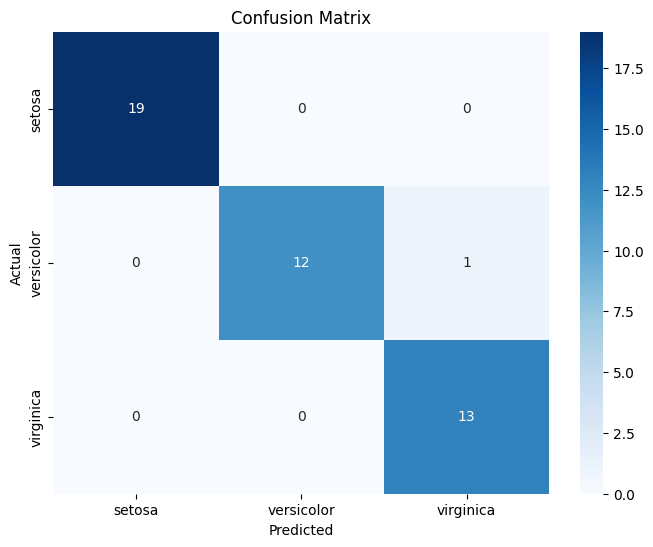


Enter new data for prediction



Enter sepal Length:  5.3
Enter sepal Width:  4.2
Enter petal Length:  1.4
Enter petal Width:  0.3


Predicted class: setosa


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('Iris_Dataset.csv')

# Define features and target
X = df.iloc[:, :4]
y = df.iloc[:, -1]

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gnb.predict(X_test)

# Confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_pred)

print("Model Report\n")
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
precision = metrics.precision_score(y_test, y_pred, average='weighted')
print("Precision:", precision)

recall = metrics.recall_score(y_test, y_pred, average='weighted')
print("Recall:", recall)

# Generate a classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

# Plot the confusion matrix heatmap
plt.figure(figsize=(8, 6))
class_names = y.unique()  # Automatically handle class names
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Input new data for prediction
print("\nEnter new data for prediction\n")

sl = float(input('Enter sepal Length: '))
sw = float(input('Enter sepal Width: '))
pl = float(input('Enter petal Length: '))
pw = float(input('Enter petal Width: '))

# Make a prediction on the new input data
new_data = [[sl, sw, pl, pw]]
new_prediction = gnb.predict(new_data)
print("Predicted class:", new_prediction[0])
